In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import json 
import config
from torchvision.utils import save_image
import dataloader

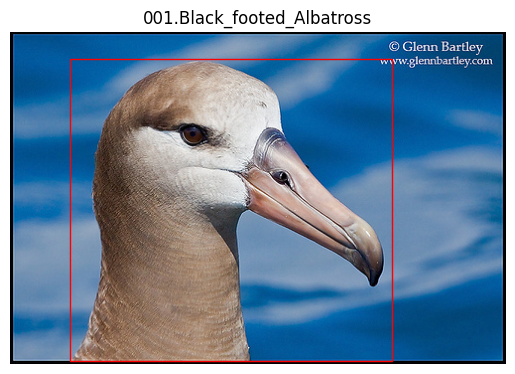

Size of the image [C, H, W]: torch.Size([3, 335, 500])
Bounding box coordinates [x, y, width, height]: [60.0, 27.0, 325.0, 304.0]


In [3]:
dataset = dataloader.CUB200Dataset(config.ROOT_DIR, )
loader = DataLoader(dataset, batch_size=1)
x, y, _= next(iter(loader))

# Display the first image from the batch
img = x[0].numpy().transpose((1, 2, 0))

plt.imshow(img)
bbox = dataset.bounding_boxes_dict[str(y[0].item())]
rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)

plt.title(dataset.classes_dict[str(y[0].item())])
plt.axis('off')
plt.show()
print(f"Size of the image [C, H, W]: {x[0].shape}")
print(f"Bounding box coordinates [x, y, width, height]: {bbox}")

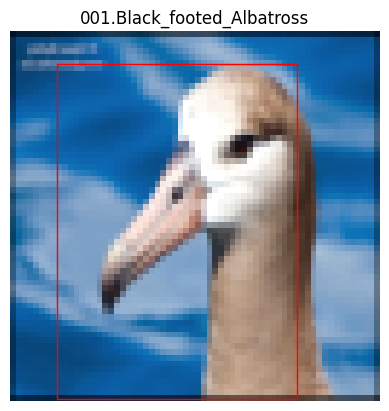

Size of the image [C, H, W]: torch.Size([3, 64, 64])
Bounding box coordinates [x, y, width, height]: tensor([ 7.6800,  5.1582, 41.6000, 58.0776])


In [19]:
dataset = dataloader.CUB200Dataset(config.ROOT_DIR, config.transform)
loader = DataLoader(dataset, batch_size=5)
x, y, bbox = next(iter(loader))

# Display the first image from the batch
img = x[0].numpy().transpose((1, 2, 0))
img = img * 0.5 + 0.5  # De-normalize
plt.imshow(img)
bbox = bbox[0]
rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)

plt.title(dataset.classes_dict[str(y[0].item())])
plt.axis('off')
plt.show()
print(f"Size of the image [C, H, W]: {x[0].shape}")
print(f"Bounding box coordinates [x, y, width, height]: {bbox}")

In [4]:
print(f"Image ID: {str(y[0].item())}")
print(f"Image class: {dataset.image_class_labels_dict[str(y[0].item())]}")
print(f"Bird class: {dataset.classes_dict[str(y[0].item())]}")

Image ID: 1
Image class: 1
Bird class: 001.Black_footed_Albatross


In [5]:
print(f"Train dataset size: {len([i for i in dataset.train_test_split_dict.values() if i == 'train'])}")
print(f"Test dataset size: {len([i for i in dataset.train_test_split_dict.values() if i == 'test'])}")

Train dataset size: 9430
Test dataset size: 2358


In [6]:
print(f"Unique labels in the dataset: {len(set(dataset.image_class_labels_dict.values()))}")

Unique labels in the dataset: 200


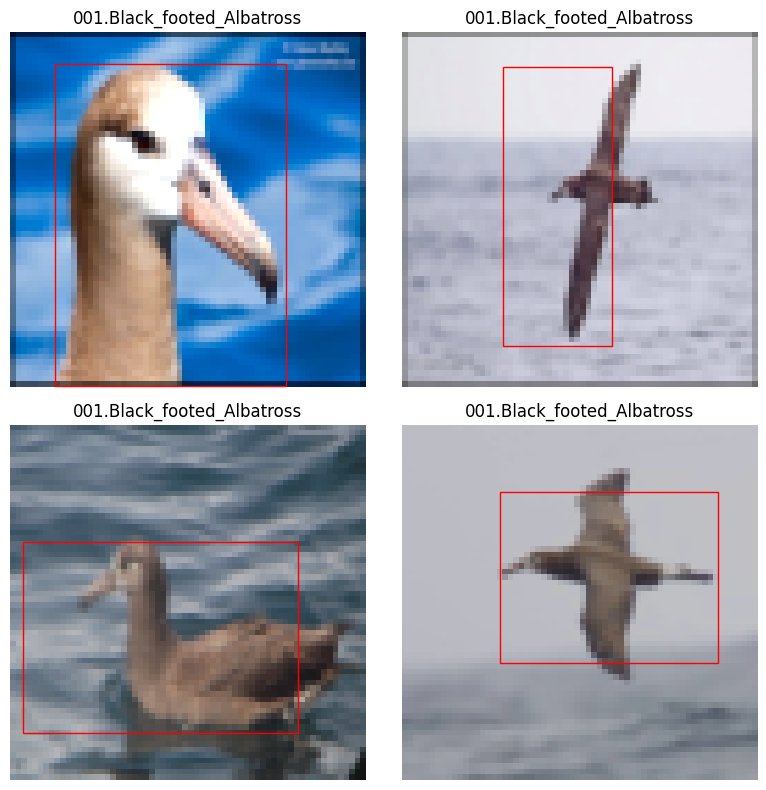

In [43]:
# transform = transforms.Compose([
#         transforms.Resize((config.IMAGE_SIZE, config.IMAGE_SIZE)),
#         transforms.ToTensor(),
#         #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # idk 
#         transforms.Normalize(0.5, 0.5)
#     ])

# dataset = dataloader.CUB200Dataset(config.ROOT_DIR, transform)
loader = DataLoader(dataset, batch_size=4)
x, y, bbox = next(iter(loader))
# Create a 2x2 grid for displaying images
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

for i in range(2):
    for j in range(2):
        img_idx = 2 * i + j
        img = x[img_idx].numpy().transpose((1, 2, 0))
        img = img * 0.5 + 0.5  # De-normalize
        
        axs[i, j].imshow(img)
        
        # Draw bounding box
        current_bbox = bbox[img_idx]
        rect = patches.Rectangle((current_bbox[0], current_bbox[1]), 
                                  current_bbox[2], current_bbox[3], 
                                  linewidth=1, edgecolor='r', facecolor='none')
        axs[i, j].add_patch(rect)
        
        axs[i, j].set_title(dataset.classes_dict[str(y[img_idx].item())])
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()